# 1. Import Data & Python Packages

In [4]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
# sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True) # 设置背景色、风格、字型、字体等

import warnings
warnings.simplefilter(action='ignore') # 忽略警告消息

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("./titanic/train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("./titanic/test.csv")

# preview train data
train_df.head()

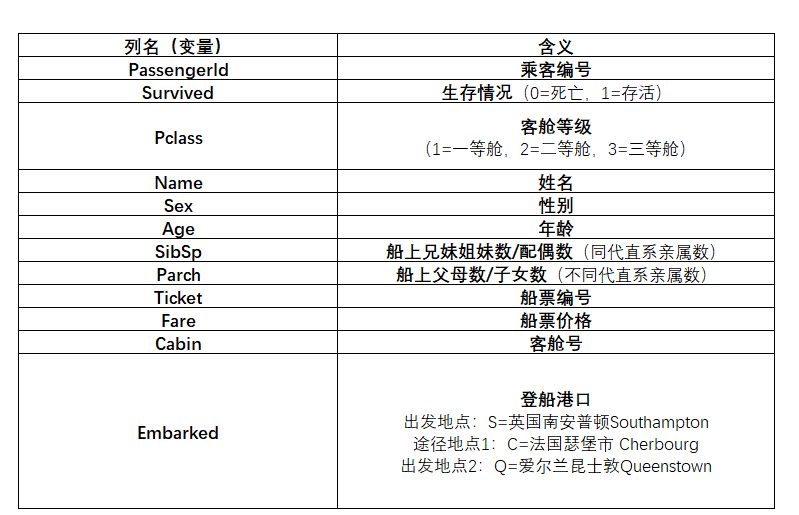

In [ ]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0])) # shape[0]代表行数

In [5]:
# preview test data
test_df.head()

NameError: name 'test_df' is not defined

In [6]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

NameError: name 'test_df' is not defined

# 2. Data Quality & Missing Value Assessment

In [7]:
# check missing values in train data
train_df.isnull().sum() # 统计每列数据缺失的个数

NameError: name 'train_df' is not defined

## 2.1. Age - Missing Values

In [8]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

NameError: name 'train_df' is not defined

In [9]:
# hist为直方图
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
# plot为线形图
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

NameError: name 'train_df' is not defined

In [10]:
# mean 表示求这一列的平均值
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median 表示这一列的中位数
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

NameError: name 'train_df' is not defined

## 2.2. Cabin - Missing Values

In [11]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

NameError: name 'train_df' is not defined

## 2.3. Embarked - Missing Values

In [12]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

NameError: name 'train_df' is not defined

In [13]:
# countplot代表柱状图
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):


NameError: name 'train_df' is not defined

In [14]:
# 打印数量最大的上船地点
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

NameError: name 'train_df' is not defined

## 2.4. Final Adjustments to Data (Train & Test)

In [15]:
# fillna表示补齐缺失的值
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

NameError: name 'train_df' is not defined

# 技巧：
## 缺失较少时，使用合适的值进行填充。缺失较多时，这一列特征直接删除。

In [16]:
# check missing values in adjusted train data
train_data.isnull().sum()

NameError: name 'train_data' is not defined

In [17]:
# preview adjusted train data
train_data.head()

NameError: name 'train_data' is not defined

# 数据补齐之后有什么变化？

In [18]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

NameError: name 'train_df' is not defined

<Figure size 1080x576 with 0 Axes>

### 2.4.1. Additional Variables

In [19]:
## Create categorical variable for traveling alone
# 特征融合--创造新的特征
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

NameError: name 'train_data' is not defined

In [20]:
#create categorical variables and drop some variables
# get_dummies：get_dummies 是利用pandas实现one hot encode的方式
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

NameError: name 'train_data' is not defined

# 训练集做的所有预处理手段，都要对测试集重新做一遍！！！

In [21]:
test_df.isnull().sum()

NameError: name 'test_df' is not defined

In [22]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

NameError: name 'test_df' is not defined

# 3. Exploratory Data Analysis
## 数据分析和预处理不一样的地方：一个是共性，一个是特性。

## 3.1. Exploration of Age

In [23]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()



NameError: name 'sns' is not defined

<Figure size 1080x576 with 0 Axes>

幸存者和死者的年龄分布实际上非常相似。一个显著的区别是，在幸存者中，儿童的比例更大。乘客们显然是想在救生筏上给孩子们一个位置，以拯救他们。

#### sns.kdeplot()核密度估计图
#### 核密度估计是概率论上用来估计未知的密度函数，属于非参数检验，通过核密度估计图可以比较直观的看出样本数据本身的分布#特征
#### 主要用来绘制特征变量y值的分布，看看数据符合哪种分布
#### 用的地方不多，了解为主，不需要深入研究

In [24]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()
# sns.barplot：条形图以矩形条的方式展示数据的点估值和置信区间

NameError: name 'final_train' is not defined

<Figure size 1440x576 with 0 Axes>

In [25]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

NameError: name 'final_train' is not defined

## 3.2. Exploration of Fare

In [26]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1080x576 with 0 Axes>

由于生存者和死者的费用分布明显不同，这可能是我们最终模型中的一个重要预测因素。支付较低票价的乘客似乎更不可能存活下来。这可能与“乘客级”(Passenger Class)密切相关。



## 3.3. Exploration of Passenger Class

In [27]:
sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
plt.show()

NameError: name 'sns' is not defined

不出所料，头等舱乘客最安全。

##  3.4. Exploration of Embarked Port

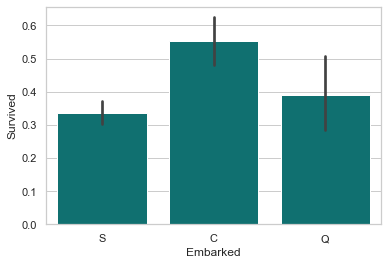

In [64]:
sns.barplot('Embarked', 'Survived', data=train_df, color="teal")
plt.show()

## 3.5. Exploration of Traveling Alone vs. With Family

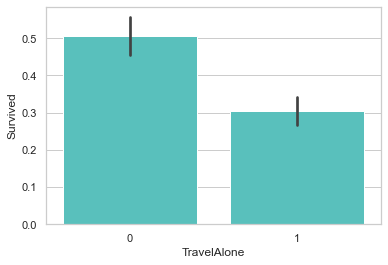

In [65]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

没有家人随行的旅行者比有家人随行的人更有可能在灾难中丧生。考虑到那个时代，独自旅行的人很可能是男性。

## 3.6. Exploration of Gender Variable

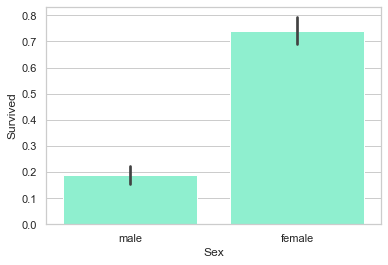

In [66]:
sns.barplot('Sex', 'Survived', data=train_df, color="aquamarine")
plt.show()

这是一个非常明显的区别。显然，女性身份大大增加了你的生存机会。

# 4. Logistic Regression and Results

## 4.1. Feature selection

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


### 4.1.2. Feature ranking with recursive feature elimination and cross-validation

Optimal number of features: 9
Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


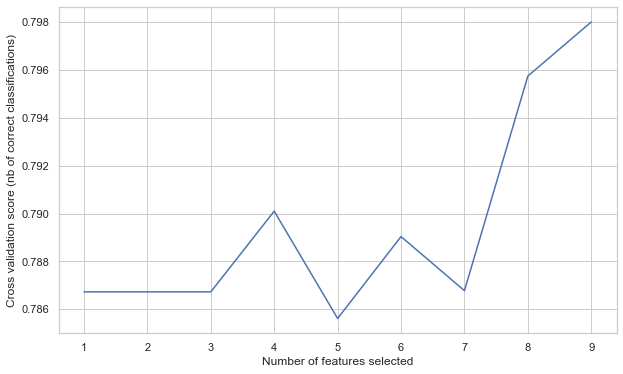

In [68]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### 递归式特征消除：Recursive feature elimination
#### 递归式特征消除和交叉验证：recursive feature elimination and cross-validation
#### recursive feature elimination ( RFE )通过学习器返回的 coef_ 属性 或者 feature_importances_ 属性来获得每个特征的重要程度。 然后，从当前的特征集合中移除最不重要的特征。在特征集合上不断的重复递归这个步骤，直到最终达到所需要的特征数量为止。
#### RFECV通过交叉验证来找到最优的特征数量。如果减少特征会造成性能损失，那么将不会去除任何特征。这个方法用以选取单模型特征相当不错，但是有两个缺陷，一，计算量大。二，随着学习器（评估器）的改变，最佳特征组合也会改变，有些时候会造成不利影响。

In [3]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
# heatmap表示热力图
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

NameError: name 'final_train' is not defined

Heatmap中文称为热点图，热点图是通过使用不同的标志将图或页面上的区域按照受关注程度的不同加以标注并呈现的一种分析手段，标注的手段一般采用颜色的深浅、点的疏密以及呈现比重的形式，因此使用热点图，你可以把感兴趣区域更直观的表现出来。如下图，就是漂亮的热点图。

## 4.2. Review of model evaluation procedures

### 4.2.1. Model evaluation based on simple train/test split using train_test_split() function

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.838


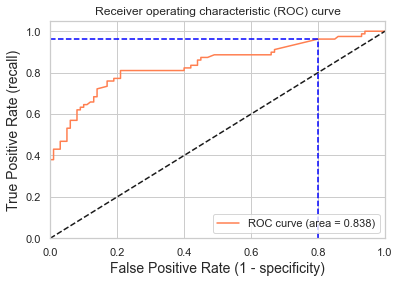

Using a threshold of 0.070 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [70]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
# 通过sklearn的roc_curve函数计算false positive rate和true positive rate以及对应的threshold
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)


print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### predict ： model.predict()得到的预测是预测类别结果，如果是二分类，就是0和1
### predict_proba：此函数得到的结果是一个多维数组，如果是二分类，则是二维数组，第一列为样本预测为0的概率，第二列为样本预测为1的概率。
### roc_curve：roc区间就是关于fpr和tpr的图，因此计算auc，需要先计算fpr和tpr
 https://blog.csdn.net/ODIMAYA/article/details/103138388              
 https://www.cnblogs.com/wzyuan/p/9440017.html

### 4.2.2. Model evaluation based on K-fold cross-validation using cross_val_score() function

In [71]:
# 10-fold cross-validation logistic regression
# cross_val_score()：交叉验证方法
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.796
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.850


###  cross_val_score() :
scoring='accuracy'------->  返回正确分类的比例              
scoring='neg_log_loss' ---------> 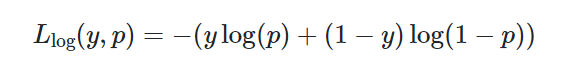    
scoring='roc_auc'  ---------> ROC面积大小
### https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### 4.2.3. Model evaluation based on K-fold cross-validation using cross_validate() function

In [72]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.796 (+/-0.024)
LogisticRegression average log_loss: 0.454 (+/-0.037)
LogisticRegression average auc: 0.850 (+/-0.028)


###   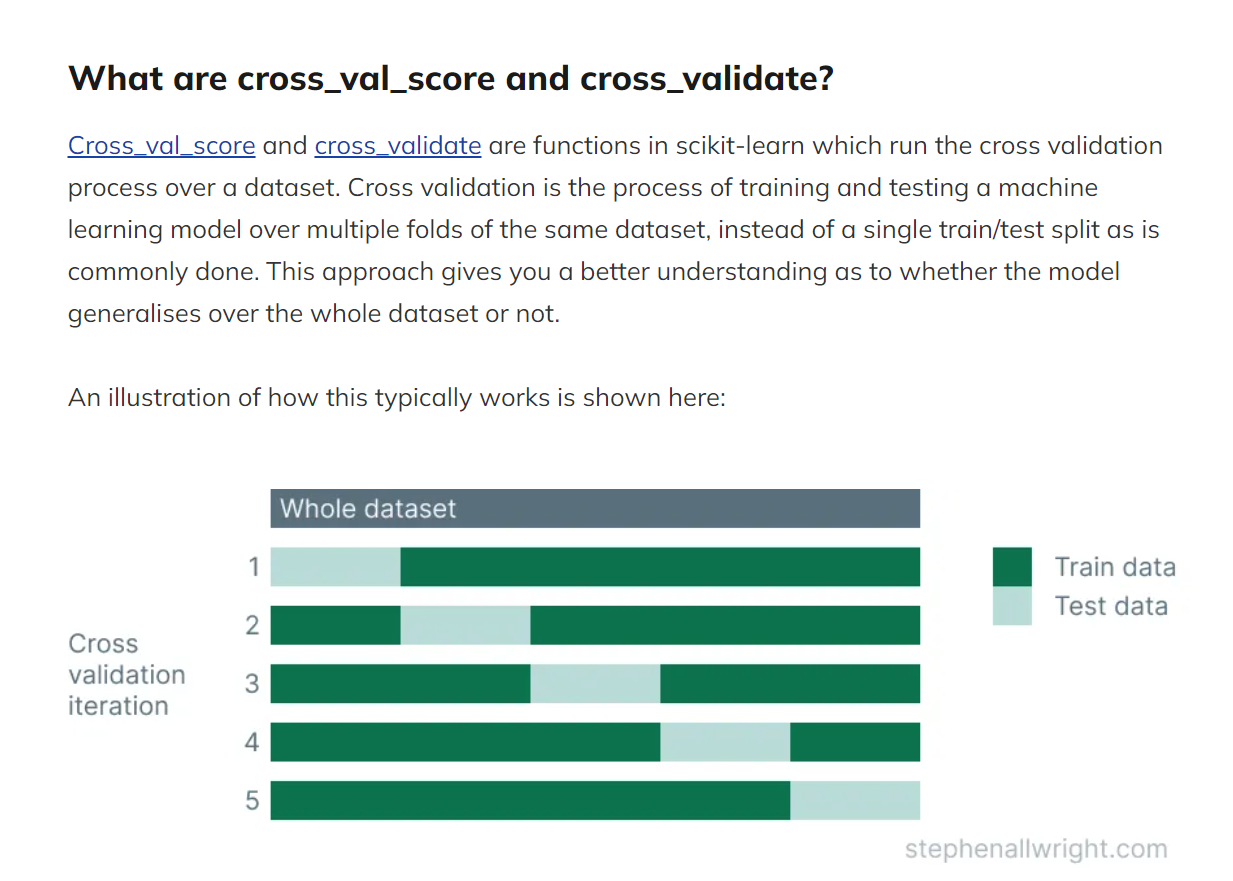
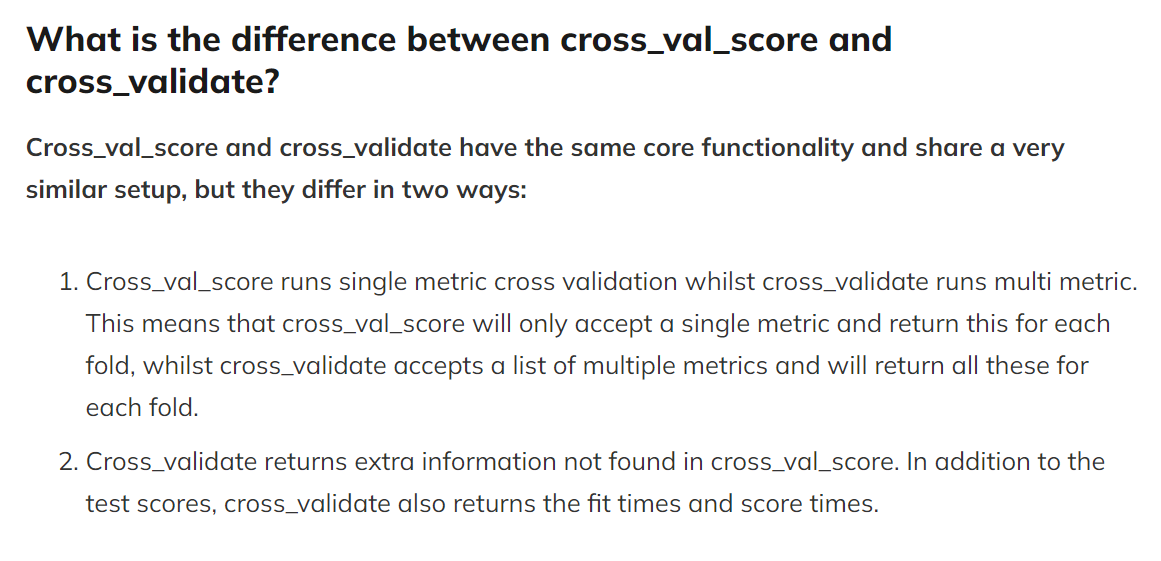  
### https://stephenallwright.com/difference-cross_val_score-cross_validate/

当我们去掉“Fare”功能时会发生什么?

In [73]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.798 (+/-0.029)
LogisticRegression average log_loss: 0.455 (+/-0.037)
LogisticRegression average auc: 0.849 (+/-0.028)


我们注意到模型有轻微的退化。“Fare”变量携带有用的信息。它的存在是逻辑回归模型的一个特征。

In [74]:
cols = ["Age","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.796 (+/-0.024)
LogisticRegression average log_loss: 0.454 (+/-0.037)
LogisticRegression average auc: 0.850 (+/-0.028)
